Ways to access multi30k

Note that I had to request access.

```
You can download our data from the following site:
http://shannon.cs.illinois.edu/DenotationGraph/data/index.html
```

In [1]:
from collections import Counter
import gzip
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image
import tarfile
import tqdm

import torch
import torchvision
from torchvision import transforms
from torchvision.utils import save_image

In [2]:
images_dir = "/Users/benpeloquin/Data/general/multi30k/flickr30k-images/"

In [3]:
im1 = Image.open(os.path.join(images_dir, '3628994466.jpg')); print(im1.size);
im2 = Image.open(os.path.join(images_dir, '6335241.jpg')); print(im2.size);
im3 = Image.open(os.path.join(images_dir, '2367387854.jpg')); print(im3.size);

(500, 334)
(375, 500)
(500, 332)


In [4]:
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])
image_transform = transforms.Compose([
    # Note (BP): resizing (256, 256) 
    # here was picked somewhat arbitrarily,
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    normalize
])

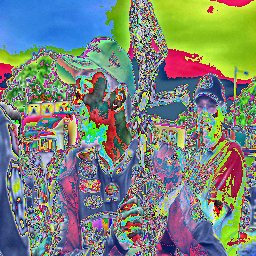

In [5]:
transforms.ToPILImage()(image_transform(im1))

In [6]:
image_batch = \
    torch.stack([image_transform(im1), image_transform(im2), image_transform(im3)])

In [7]:
grid_img = torchvision.utils.make_grid(image_batch, nrow=1)

In [8]:
def images2grid(image_batch):
    batch_size, c, h, w = image_batch.size()
    nrows = int(batch_size / 2)
    grid_img = torchvision.utils.make_grid(image_batch, nrow=nrows)
    return grid_img

In [9]:
save_image(images2grid(image_batch), "test_save_imge.png", normalize=True)

In [52]:
img_temp = plt.imshow(grid_img.permute(1, 2, 0))

AttributeError: 'AxesImage' object has no attribute 'permute'

In [34]:
basewidth = 500
wpercent = basewidth / float(im.size[0])
hsize = int(float(im.size[1])*wpercent)
print(wpercent, hsize)

NameError: name 'im' is not defined

In [7]:
dims = []

for img_file_name in tqdm.tqdm(os.listdir(images_dir)):
    if img_file_name[-3:] == 'jpg':
        img_fp = os.path.join(images_dir, img_file_name)
        im = Image.open(img_fp)
        im = transforms.ToTensor()(im)
        dims.append(im.shape)


100%|██████████| 31784/31784 [04:14<00:00, 124.80it/s]


In [8]:
len(dims)

31783

In [11]:
first = [d[0] for d in dims]
second = [d[1] for d in dims]
third = [d[2] for d in dims]

In [16]:
print(len(Counter(first)))
print(len(Counter(second)))
print(len(Counter(third)))

1
331
279


In [17]:
Counter(third)

Counter({500: 22756,
         375: 2312,
         428: 8,
         333: 2570,
         360: 30,
         334: 483,
         388: 12,
         353: 19,
         331: 75,
         298: 7,
         368: 23,
         385: 14,
         386: 13,
         330: 36,
         352: 21,
         440: 10,
         272: 2,
         370: 20,
         347: 17,
         447: 10,
         472: 7,
         285: 5,
         309: 13,
         377: 18,
         261: 3,
         381: 19,
         287: 5,
         433: 5,
         365: 16,
         332: 507,
         359: 24,
         380: 20,
         397: 10,
         335: 147,
         400: 211,
         498: 8,
         281: 26,
         450: 25,
         325: 18,
         306: 11,
         300: 15,
         357: 124,
         376: 36,
         346: 21,
         320: 27,
         389: 10,
         480: 36,
         324: 18,
         343: 17,
         369: 19,
         374: 60,
         340: 15,
         455: 4,
         364: 17,
         419: 6,
         

In [22]:
second_cnts = list(Counter(second).keys())
third_cnts = list(Counter(third).keys())
print(np.max(second_cnts), np.min(second_cnts), np.max(third_cnts), np.min(third_cnts))

500 112 500 164


In [57]:
def center_crop(im, new_width, new_height):
    """https://stackoverflow.com/questions/16646183/crop-an-image-in-the-centre-using-pil"""
    width, height = im.size   # Get dimensions

    left = (width - new_width)/2
    top = (height - new_height)/2
    right = (width + new_width)/2
    bottom = (height + new_height)/2

    return im.crop((left, top, right, bottom))

def rescale(im, basewidth, hsize):
    wpercent = (basewidth/float(im.size[0]))
    hsize = int((float(im.size[1])*wpercent))
    img = im.resize((basewidth, hsize), Image.ANTIALIAS)
    return img

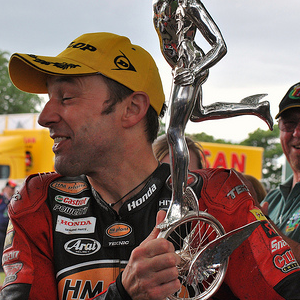

In [56]:
center_crop(im1, 300, 300)

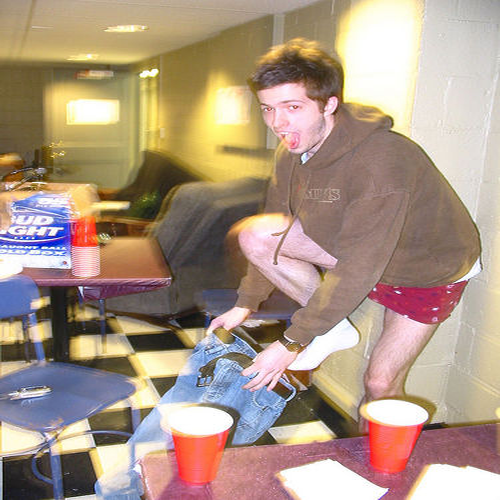

In [73]:
im2.resize((500, 500), Image.ANTIALIAS)

In [70]:
rescale(im2, 250, 250).size

(250, 333)

In [71]:
rescale(im1, 250, 250).size

(250, 167)